In [27]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline  

# Lectura de Dataset

In [2]:
lista_attr = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        line.strip()
        initia = line.find('[')
        lista_list = [float(x) for x in line[initia + 1: -2].split(', ')]
        lista_attr.append(lista_list)


# PCA

In [56]:
X = np.array(lista_attr)
pca = PCA(n_components = 50)
X_new = pca.fit_transform(X) 

# KMeans

In [34]:
k1 = 10
k2 = 20
k3 = 30
klist = [k1,k2,k3]
labels = []
centroids = []
silavg = []
for k in klist :
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_new)
    cluster_labels = kmeans.labels_
    labels += [cluster_labels]
    centroids += [kmeans.cluster_centers_]
    silhouette_avg = silhouette_score(X_new, cluster_labels, metric='euclidean')
    print(silhouette_avg)
    print(metrics.calinski_harabaz_score(X_new, cluster_labels))
#Silhoutte Score 

0.0513422809161
193.171027684
0.0526160558072
126.843785008
0.0592181288304
97.6910506849


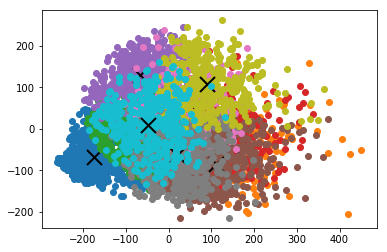

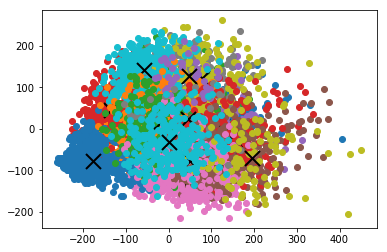

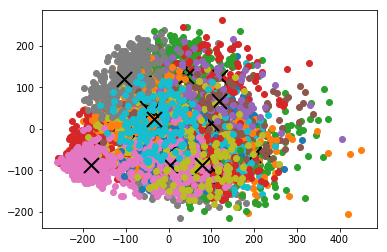

In [7]:
#Plot de cada K
n = 0
for k in klist :
    for i in range(k):
        ds = X_new[np.where(labels[n]==i)]
        plt.plot(ds[:,0],ds[:,1],'o')
        lines = plt.plot(centroids[n][i,0],centroids[n][i,1],'kx')
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    n += 1
    plt.show()

# MeanShift

In [41]:
bandwidth = estimate_bandwidth(X_new)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_new)
labels_ms = ms.labels_
cluster_centers_ms = ms.cluster_centers_
n_clusters_ = labels_ms.max()+1
print(n_clusters_)

12


In [43]:
silhouette_avg = silhouette_score(X_new, labels_ms)
print(silhouette_avg)
print(metrics.calinski_harabaz_score(X_new, labels_ms))

0.212183572872
14.1095868805


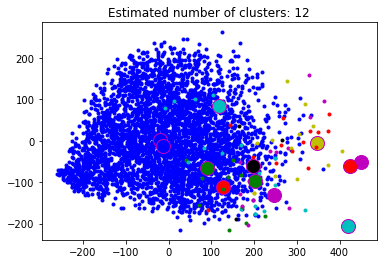

In [40]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for m, col in zip(range(n_clusters_), colors):
    my_members = labels_ms == m
    cluster_center = cluster_centers_ms[m]
    plt.plot(X_new[my_members, 0], X_new[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='m', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# DBSCAN

In [44]:
db0 = DBSCAN(eps = 100, min_samples = 4,n_jobs=-1).fit(X_new)
db1 = DBSCAN(eps = 270, min_samples = 3,n_jobs=-1).fit(X_new)
db2 = DBSCAN(eps = 240, min_samples = 53,n_jobs=-1).fit(X_new)

dblabels0 = db0.labels_
dblabels1 = db1.labels_
dblabels2 = db2.labels_

n_clusters_0 = len(set(dblabels0)) - (1 if -1 in dblabels0 else 0)
n_clusters_1 = len(set(dblabels1)) - (1 if -1 in dblabels1 else 0)
n_clusters_2 = len(set(dblabels2)) - (1 if -1 in dblabels2 else 0)

print('Estimated number of clusters: %d' % n_clusters_0)
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of clusters: %d' % n_clusters_2)

Estimated number of clusters: 3
Estimated number of clusters: 8
Estimated number of clusters: 1


In [45]:
print(silhouette_score(X_new, dblabels0))
print(silhouette_score(X_new, dblabels1))
print(silhouette_score(X_new, dblabels2))

print(metrics.calinski_harabaz_score(X_new, dblabels0))
print(metrics.calinski_harabaz_score(X_new, dblabels1))
print(metrics.calinski_harabaz_score(X_new, dblabels2))

-0.11360223712
0.0939186780108
0.119574552127
54.7365186623
23.9201193562
394.658492125


In [57]:
X_backup = X_new

# T-SNE

In [58]:
modelo = TSNE(n_components = 2, perplexity = 50,early_exaggeration=25,n_iter=5000)
t_sne=modelo.fit_transform(X_backup)

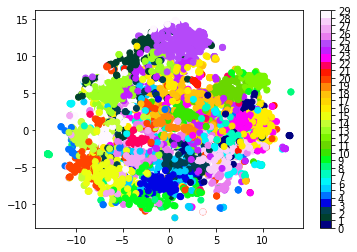

In [61]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("gist_ncar", 30))
plt.colorbar(ticks=range(30))
plt.show()
#50-15-5000

# CSV

In [62]:
ids = []
path = []
thumbs_path = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        id_start = line.find('/', 3)
        id_end = line.find('.', 3)
        actual_id = line[id_start+1:id_end]
        ids.append(int(actual_id))
        path.append('byArtworkID/' + str(line[id_start+1:id_end]) + '.jpg')
        thumbs_path.append('byArtworkID/thumbs/' + str(line[id_start+1:id_end]) + '.jpg')
        
x = []
y = []
clases = []
t_sne_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(t_sne)
for t in t_sne_scaled:
    x.append(t[0])
    y.append(t[1])

for clase in labels[0]:
    clase = str(clase)
    clases.append('Clase ' + clase)


DataSet = list(zip(ids, x, y,clases,path,thumbs_path))
df = pd.DataFrame(data = DataSet, columns=['id', 'x', 'y','class','file','thumbnail'])
df
df.to_csv('data.csv',index=False,header=True)